In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [2]:
df=sm.datasets.fair.load_pandas().data

In [3]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


## Data Preprocessing

In [4]:
#labelling affairs if 1 lady has affair 0 lady doesnot have affair 
df["affairs"]=(df.affairs > 0).astype(int)

In [5]:
df["affairs"].unique()   #converting target variable into binary form 

array([1, 0], dtype=int64)

In [6]:
df.isnull().values.any()

False

In [7]:
y, X = dmatrices('affairs ~ rate_marriage + age + yrs_married + children +  religious + educ + C(occupation) + C(occupation_husb)+0',df, return_type="dataframe")
#0 is added to remove intercept from the x columns

In [8]:
X.head()

,C(occupation)[1.0],C(occupation)[2.0],C(occupation)[3.0],C(occupation)[4.0],C(occupation)[5.0],C(occupation)[6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [9]:
X = X.rename(columns =
{'C(occupation)[1.0]':'occ_1',
'C(occupation)[2.0]':'occ_2',
'C(occupation)[3.0]':'occ_3',
'C(occupation)[4.0]':'occ_4',
'C(occupation)[5.0]':'occ_5',
'C(occupation)[6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
X.head()

,occ_1,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [10]:
df=pd.concat([X,y],axis=1)

In [11]:
print(df[df["affairs"]==0].shape)
print(df[df["affairs"]==1].shape)

(4313, 18)
(2053, 18)


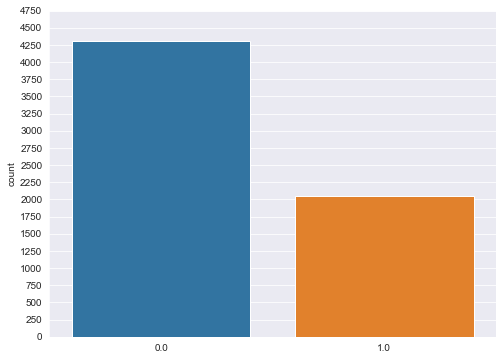

In [12]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.yticks(range(0,5000,250))
plt.show()


As we see the visual the dataset is imbalanced because class 0 is almost double of class 1 .


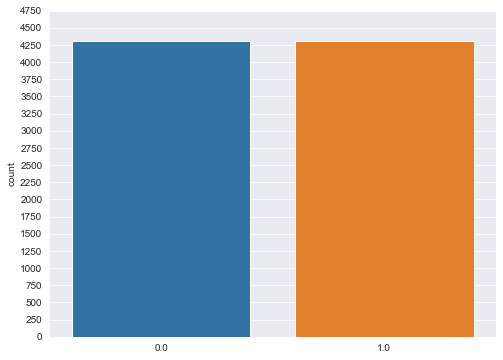

In [13]:
#Balancing the imbalanced dataset
from imblearn.over_sampling import RandomOverSampler
rdm=RandomOverSampler()
X,y=rdm.fit_sample(X,y)
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))# converting y into array form to plot
plt.yticks(range(0,5000,250)) 
plt.show()


In [14]:
df=pd.concat([X,y],axis=1)  #updating the balanced form of dataset
print(df[df["affairs"]==0].shape)
print(df[df["affairs"]==1].shape)
df.head() 

(4313, 18)
(4313, 18)


,occ_1,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0


In [15]:
df.describe()

,occ_1,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affairs
count,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000
mean,0.006260,0.129724,0.446209,0.271853,0.127174,0.018780,0.203571,0.079527,0.313703,0.288083,0.082077,3.998957,29.478263,9.574368,1.485161,2.381869,14.143404,0.500000
std,0.078878,0.336019,0.497127,0.444940,0.333187,0.135757,0.402677,0.270575,0.464024,0.452896,0.274499,1.000463,6.826714,7.293412,1.429811,0.872386,2.150177,0.500029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,22.000000,2.500000,0.000000,2.000000,12.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,0.500000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,1.000000


In [16]:
df.shape

(8626, 18)

## Data Visulaization

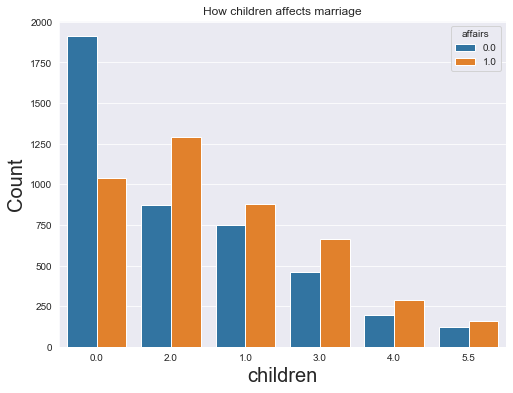

In [17]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("children",data=df,hue="affairs",order=df.children.value_counts().index)
plt.xlabel("children",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("How children affects marriage")
plt.show()

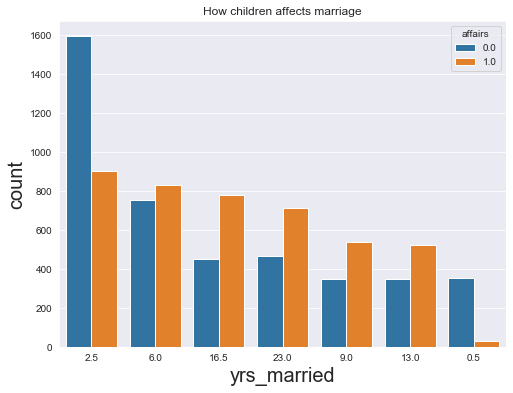

In [18]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("yrs_married",hue="affairs",data=df,order=df["yrs_married"].value_counts().index)
plt.xlabel("yrs_married",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.title("How children affects marriage")
plt.show()

As the married couple spend more and more years together there would be great chance that his wife would be in extra marital relation.
Best result of trust and negligible extra marital affair seen in newly married couple.

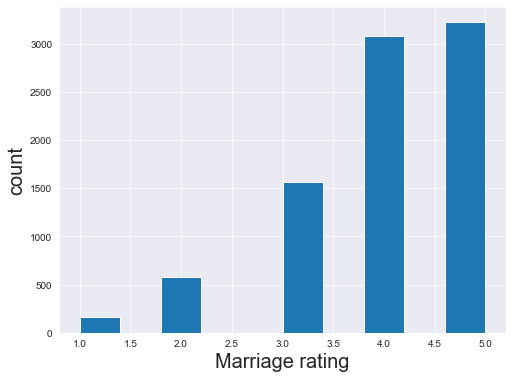

In [19]:
plt.figure(figsize=(8,6))
plt.hist(df["rate_marriage"])
plt.xlabel("Marriage rating",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

From above figure we can say large bunch of women is satisfied with their married life irrespective of their affairs.

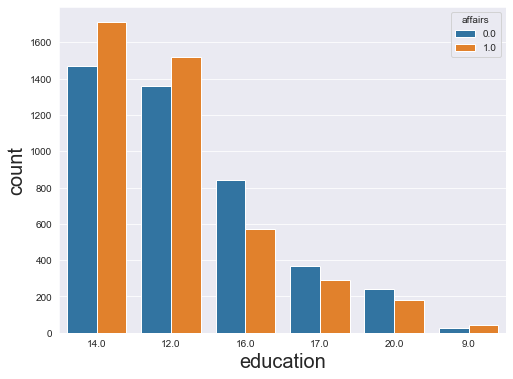

In [20]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("educ",hue="affairs",data=df,order=df["educ"].value_counts().index)
plt.xlabel("education",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

Women  who is doing white collar jobs having less chance of affair and women  with graduation and higher educational background
also has less chance of affair but for those womens  who is in college and have lower literacy has shown more interest in extra marital affairs.

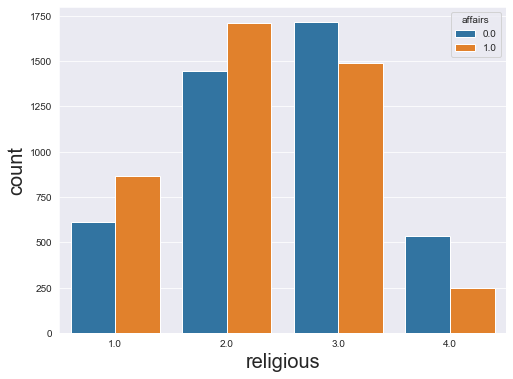

In [21]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("religious",hue="affairs",data=df)
plt.xlabel("religious",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

More the women will be religious lesser will be the chance that women will have extra marital affair.

## Modeling

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6900, 17)
(6900, 1)
(1726, 17)
(1726, 1)


In [23]:
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_predicted=clf.predict(x_test)
y_train_predicted=clf.predict(x_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Evaluation

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve
print("train set accuracy score: ",accuracy_score(y_train,y_train_predicted))
print("test set accuracy score :",  accuracy_score(y_test,y_predicted))

train set accuracy score:  0.6827536231884058
test set accuracy score : 0.6732329084588644


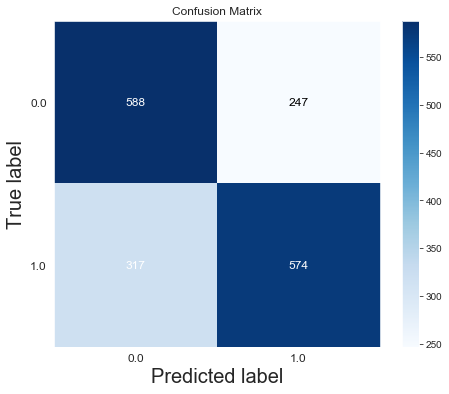

In [25]:
import scikitplot as splt
from sklearn import metrics
ax=splt.metrics.plot_confusion_matrix(y_test,y_predicted,text_fontsize="large",figsize=(8,6))
plt.xlabel("Predicted label",fontsize=20)
plt.ylabel("True label",fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Here we should be careful about FP because our model will predict  the women having affair but in actual she won't have any affair which may resulted into her divorce for the mistake has not done so we should show carefulness about FP value when we are dealing with such sensitive kind of prediction.

In [26]:
pred_probab=clf.predict_proba(x_test)
np.array(pred_probab).reshape(-1,1)

array([[0.79649388],
       [0.20350612],
       [0.18567537],
       ...,
       [0.30869737],
       [0.4548154 ],
       [0.5451846 ]])

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

         0.0       0.65      0.70      0.68       835
         1.0       0.70      0.64      0.67       891

    accuracy                           0.67      1726
   macro avg       0.67      0.67      0.67      1726
weighted avg       0.68      0.67      0.67      1726



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


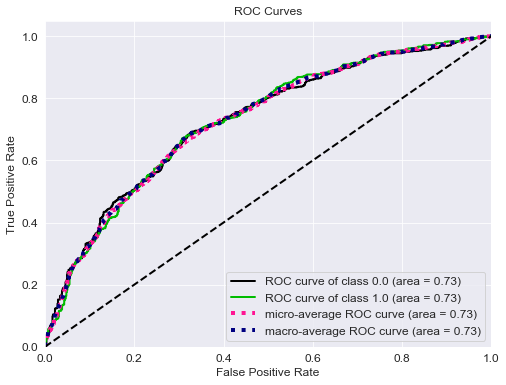

In [28]:
splt.metrics.plot_roc_curve(y_test,pred_probab,text_fontsize="large",figsize=(8,6))

## Final Testing of model

In [29]:
print("Prediction chance of your model :")
print("Here your chance of prediction is :",clf.predict_proba(np.array([[0,0,0,0,0,1,1,0,0,0,0,4,32,5,2,3,17]]))*100)

Prediction chance of your model :
Here your chance of prediction is : [[66.58482234 33.41517766]]


In [32]:
print("Here your chance of prediction is : 33.79 %")

Here your chance of prediction is : 33.79 %


In [31]:
print("your prediction is  :",clf.predict(np.array([[0,0,0,0,0,1,1,0,0,0,0,4,32,5,2,3,17]])))

your prediction is  : [0.]
